In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
from scipy.stats import pearsonr
import numpy as np

## Load the data
Our first step is to load the data from open source using request. Here we first load the data in json form and then convert it to pandasdataframe.

In [2]:
r = requests.get('https://feeds.citibikenyc.com/stations/stations.json')

In [3]:
r.text

u'{"executionTime":"2016-08-22 09:36:55 PM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":23,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":16,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-08-22 09:33:14 PM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":27,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":6,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-08-22 09:36:44 PM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":21,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"av

In [4]:
r.json()['stationBeanList']

[{u'altitude': u'',
  u'availableBikes': 16,
  u'availableDocks': 23,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-08-22 09:33:14 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 6,
  u'availableDocks': 27,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-08-22 09:36:44 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 

In [5]:
r.json().keys()

[u'executionTime', u'stationBeanList']

In [6]:
len(r.json()['stationBeanList'])

663

In [7]:
key_list = []
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)
            

In [8]:
key_list

[u'availableDocks',
 u'totalDocks',
 u'city',
 u'altitude',
 u'stAddress2',
 u'longitude',
 u'lastCommunicationTime',
 u'postalCode',
 u'statusValue',
 u'testStation',
 u'stAddress1',
 u'stationName',
 u'landMark',
 u'latitude',
 u'statusKey',
 u'availableBikes',
 u'id',
 u'location']

In [9]:
key_list1 = r.json()['stationBeanList'][1].keys()

In [10]:
if key_list == key_list1:
    print('yes')

yes


In [5]:
df = json_normalize(r.json()['stationBeanList'])

In [6]:
df.head(100)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,16,23,,72,,2016-08-22 09:33:14 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,6,27,,79,,2016-08-22 09:36:44 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,6,21,,82,,2016-08-22 09:35:06 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,45,16,,83,,2016-08-22 09:33:07 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,18,18,,116,,2016-08-22 09:36:11 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39
5,,9,10,,119,,2016-08-22 09:36:50 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19
6,,4,14,,120,,2016-08-22 09:35:38 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19
7,,25,2,,127,,2016-08-22 09:36:50 PM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31
8,,9,20,,128,,2016-08-22 09:33:39 PM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,3,Not In Service,False,30
9,,0,46,,137,,2016-08-22 09:32:59 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46


## Data Analysis
Here we first walkthrough the data to view distributions of "availableBikes" and "totalDocks". What we found is that the distribution of "availableBikes" is highly skrewed, while the ditribution of "totalDocks" is close to normal distribution.

(array([ 247.,   61.,   52.,   39.,   50.,   33.,   42.,   17.,   26.,
          27.,   22.,   15.,   13.,    7.,    7.,    1.,    2.,    0.,
           1.,    1.]),
 array([  0.  ,   2.75,   5.5 ,   8.25,  11.  ,  13.75,  16.5 ,  19.25,
         22.  ,  24.75,  27.5 ,  30.25,  33.  ,  35.75,  38.5 ,  41.25,
         44.  ,  46.75,  49.5 ,  52.25,  55.  ]),
 <a list of 20 Patch objects>)

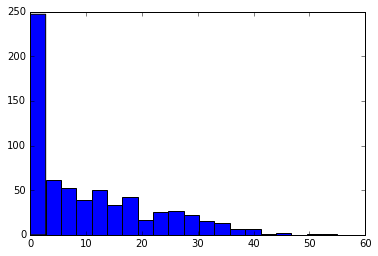

In [13]:
plt.hist(df.availableBikes,bins=20)

(array([ 93.,   0.,   1.,   1.,  19.,  50.,  60.,  41.,  79.,  78.,  54.,
         73.,  35.,   8.,  22.,  11.,   9.,  23.,   4.,   2.]),
 array([  0.  ,   3.35,   6.7 ,  10.05,  13.4 ,  16.75,  20.1 ,  23.45,
         26.8 ,  30.15,  33.5 ,  36.85,  40.2 ,  43.55,  46.9 ,  50.25,
         53.6 ,  56.95,  60.3 ,  63.65,  67.  ]),
 <a list of 20 Patch objects>)

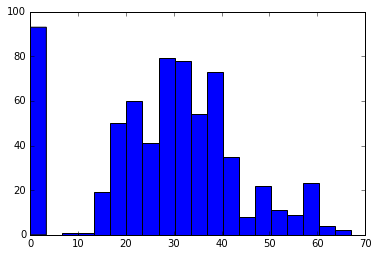

In [14]:
plt.hist(df.totalDocks,bins=20)

In [15]:
len(df)

663

We found that there are actually no test stations on the list.

In [16]:
df.testStation.value_counts()

False    663
Name: testStation, dtype: int64

552 out of 664 stations are actually in service. That's around 83%. After value_counts, we can factorize the values to generate a "In_Service" column for future analysis. Here "In service" is represented as 1, while "not in service" is represented as 0.

In [17]:
df.statusValue.value_counts()

In Service        560
Not In Service    103
Name: statusValue, dtype: int64

In [18]:
df.statusValue.value_counts(normalize = True)

In Service        0.844646
Not In Service    0.155354
Name: statusValue, dtype: float64

In [7]:
df['In_Service'] = df.statusValue.factorize()[0]

In [8]:
df.In_Service.value_counts()

0    561
1    102
Name: In_Service, dtype: int64

In [9]:
for i in range(len(df.In_Service)):
    if df.In_Service[i]:
        df.In_Service[i] = 0
    else:
        df.In_Service[i] = 1

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
df.In_Service

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     0
      ..
633    0
634    0
635    0
636    0
637    0
638    1
639    0
640    0
641    0
642    0
643    0
644    0
645    1
646    0
647    0
648    1
649    0
650    1
651    0
652    1
653    1
654    1
655    0
656    1
657    1
658    0
659    1
660    0
661    0
662    1
Name: In_Service, dtype: int64

The status key variable is highly correlate with the statusValue variable. This means we can just implement one of them for analysis. We calculated the pearson correlation of the two columns, which turns out to be -0.99, with a p-value of 0.0.

In [23]:
df.statusKey.value_counts()

1    561
3    102
Name: statusKey, dtype: int64

In [24]:
pearsonr(df.In_Service, df.statusKey)

(-1.0, 0.0)

Next, we will take a closer look at the "available bikes" column. The boxplot also indicates a highly skewed data with 75% of the total data below 16.

In [25]:
df.availableBikes.mean()

10.324283559577678

In [26]:
df.availableBikes.median()

7.0

In [27]:
df.availableBikes.std()

11.092530286146573

In [28]:
df.availableBikes.skew()

1.0436547420005942

{'boxes': [<matplotlib.lines.Line2D at 0x1134c3350>],
 'caps': [<matplotlib.lines.Line2D at 0x1134d41d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1134d74d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1134d4e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1134c3490>,
  <matplotlib.lines.Line2D at 0x1134c3b50>]}

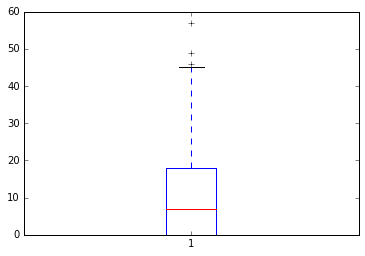

In [29]:
plt.boxplot(df.availableBikes)

In [30]:
np.percentile(df.availableBikes,75)

18.0

## Feature Engineering


We will first remove stations that are not actively in service. After removing the inactive stations, the "availableBikes" data is still highly skewed, but its mean and median increases, while standard deviation decreases. After the change, "totalDocks" data is closer to normal distribution.

In [11]:
cond = (df.In_Service == 1)
df = df[cond]

In [12]:
df.In_Service.value_counts()

1    561
Name: In_Service, dtype: int64

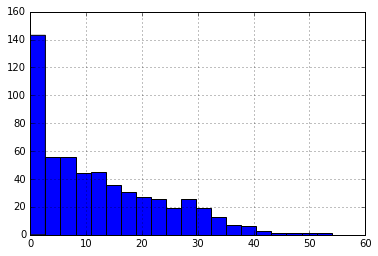

In [13]:
df.availableBikes.hist(bins=20)

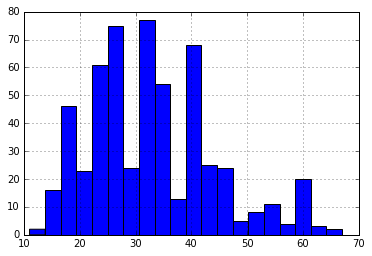

In [34]:
df.totalDocks.hist(bins=20)

In [35]:
df.availableBikes.describe()

count    561.00000
mean      12.15508
std       11.07922
min        0.00000
25%        3.00000
50%       10.00000
75%       19.00000
max       57.00000
Name: availableBikes, dtype: float64

In [36]:
df.totalDocks.describe()

count    561.000000
mean      32.707665
std       11.092151
min       11.000000
25%       24.000000
50%       31.000000
75%       39.000000
max       67.000000
Name: totalDocks, dtype: float64

In [37]:
df.totalDocks.median()

31.0

## Re-engineer the dataframe and convert to SQualite database

In [14]:
import sqlite3 as lit

In [15]:
con= lit.connect('city_bike.db')

In [25]:
with con:
    
    cur = con.cursor()
    cur.execute('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT )')

OperationalError: table citibike_reference already exists

In [26]:
import time

In [ ]:
sql = "INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)"

In [ ]:
d = r.json()['stationBeanList']


In [ ]:
d[0]['testStation']

In [ ]:
with con:
    cur = con.cursor()
    for station in r.json()['stationBeanList']:
        cur.execute(sql,(station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

In [16]:
station_ids = df['id'].tolist() 

In [17]:
len(df['id'])

561

In [18]:
len(station_ids)

561

In [19]:
station_ids = ['_' + str(x) + '_INT' for x in station_ids]

In [20]:
station_ids

['_72_INT',
 '_79_INT',
 '_82_INT',
 '_83_INT',
 '_116_INT',
 '_119_INT',
 '_120_INT',
 '_127_INT',
 '_137_INT',
 '_143_INT',
 '_144_INT',
 '_146_INT',
 '_147_INT',
 '_150_INT',
 '_151_INT',
 '_152_INT',
 '_153_INT',
 '_157_INT',
 '_161_INT',
 '_164_INT',
 '_167_INT',
 '_168_INT',
 '_173_INT',
 '_174_INT',
 '_195_INT',
 '_212_INT',
 '_216_INT',
 '_217_INT',
 '_224_INT',
 '_225_INT',
 '_228_INT',
 '_229_INT',
 '_232_INT',
 '_236_INT',
 '_237_INT',
 '_238_INT',
 '_239_INT',
 '_241_INT',
 '_242_INT',
 '_243_INT',
 '_244_INT',
 '_245_INT',
 '_247_INT',
 '_248_INT',
 '_249_INT',
 '_251_INT',
 '_252_INT',
 '_253_INT',
 '_254_INT',
 '_258_INT',
 '_259_INT',
 '_260_INT',
 '_261_INT',
 '_262_INT',
 '_263_INT',
 '_264_INT',
 '_265_INT',
 '_266_INT',
 '_267_INT',
 '_268_INT',
 '_270_INT',
 '_274_INT',
 '_275_INT',
 '_276_INT',
 '_278_INT',
 '_279_INT',
 '_280_INT',
 '_281_INT',
 '_282_INT',
 '_284_INT',
 '_285_INT',
 '_289_INT',
 '_291_INT',
 '_295_INT',
 '_296_INT',
 '_297_INT',
 '_298_INT',
 '_

In [21]:
with con:
    cur = con.cursor()
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " +  ", ".join(station_ids) + ");")

In [70]:
with con:
    cur = con.cursor()
    cur.execute('SELECT * FROM available_bikes')
    data = cur.fetchall()
    print(data)

[]


In [71]:
r.json()['executionTime']

u'2016-08-22 04:10:42 PM'

In [23]:
import time

In [24]:
from dateutil.parser import parse 

In [25]:
import collections

In [26]:
exec_time = parse(r.json()['executionTime'])

In [33]:
exec_time

datetime.datetime(2016, 8, 22, 21, 36, 55)

In [34]:
s = exec_time.strftime('%s')

In [35]:
s

'1471916215'

In [48]:
with con:
    cur = con.cursor()
    cur.execute('select * from available_bikes')
    data= cur.fetchall()
    print(data)

[(13, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)]


In [48]:
with con:
    cur = con.cursor()
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES ({0})'.format(s))

In [49]:
id_bikes = collections.defaultdict(int)

In [51]:
type(id_bikes)

collections.defaultdict

In [52]:
for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']


In [67]:
id_bikes = collections.defaultdict(int)
for k,v in df.iterrows():
    id_bikes[v['id']] = v['availableBikes']

In [69]:
len(id_bikes)

561

In [62]:
type(id_bikes.iteritems())

dictionary-itemiterator

In [58]:
d = collections.defaultdict(int)
d = [("blue",[1,2]), ("red",[3,4])]
for k,v in d:
  print "%s - %s" % (str(k), str(v))

blue - [1, 2]
red - [3, 4]


In [70]:
with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + "_INT = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s'))

In [96]:
id_bikes

defaultdict(int,
            {72: 15,
             79: 8,
             82: 0,
             83: 43,
             116: 21,
             119: 12,
             120: 10,
             127: 24,
             128: 9,
             137: 30,
             143: 10,
             144: 8,
             146: 7,
             147: 18,
             150: 18,
             151: 13,
             152: 13,
             153: 14,
             157: 19,
             161: 21,
             164: 5,
             167: 9,
             168: 27,
             173: 45,
             174: 1,
             195: 2,
             212: 14,
             216: 18,
             217: 29,
             223: 0,
             224: 1,
             225: 13,
             228: 11,
             229: 16,
             232: 5,
             236: 22,
             237: 13,
             238: 1,
             239: 31,
             241: 6,
             242: 23,
             243: 12,
             244: 27,
             245: 14,
             247: 0,
            